In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create shortcut path 
path = r"C:\Users\HP\Documents\06-2024 Instacart Basket Analysis" 

In [3]:
# import data set
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_aggregated.pkl'))

In [4]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Least busy days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Least busy days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [5]:
ords_prods_merge.shape

(32404859, 23)

In [6]:
ords_prods_merge.dtypes

product_id                  int32
product_name               object
aisle_id                    int32
department_id               int32
prices                    float32
order_id                    int32
user_id                     int32
order_number                int32
order_day_of_week           int32
order_hour_of_day           int32
days_since_prior_order    float32
add_to_cart_order           int32
reordered                   int32
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int32
loyalty_flag               object
average_spend             float32
spending_flag              object
customer_frequency        float32
frequency_flag             object
dtype: object

# Creating Bar Charts

<Axes: xlabel='order_day_of_week'>

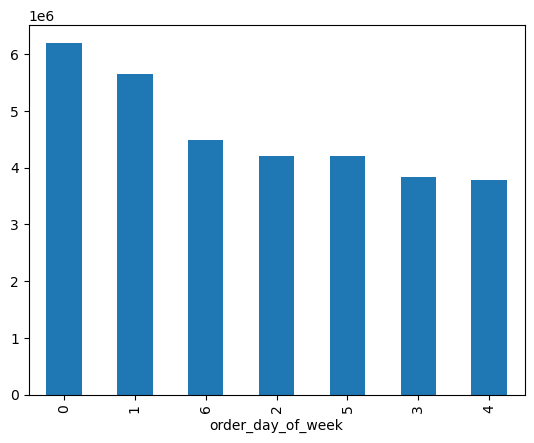

In [8]:
# create a bar chart
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

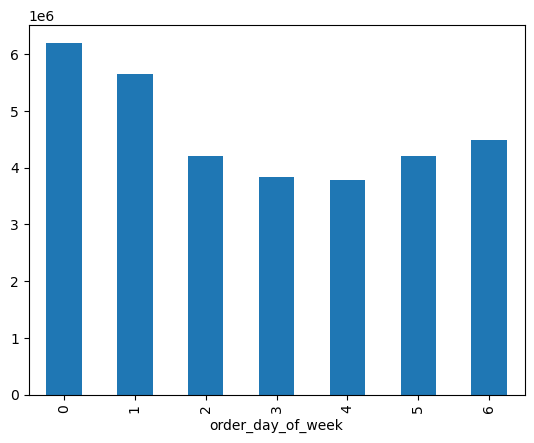

In [9]:
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
ords_prods_merge['order_day_of_week'].value_counts()

order_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [11]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

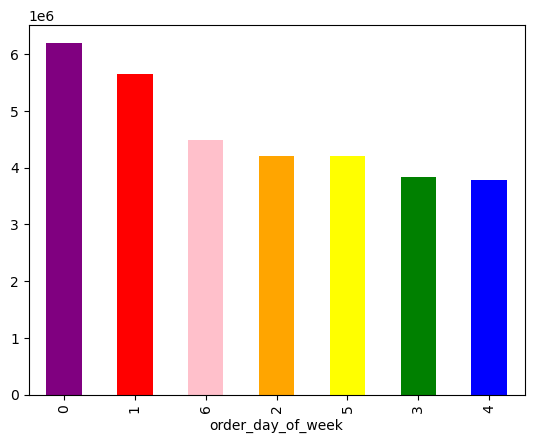

In [12]:
# changing color of bars
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Exporting Charts

In [14]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### 3. Histograms

<Axes: ylabel='Frequency'>

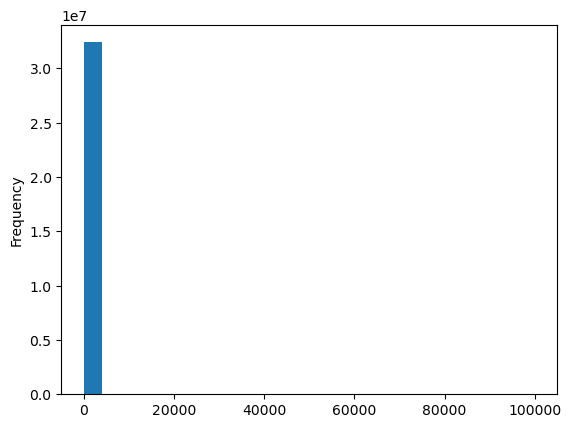

In [16]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [17]:
# consistency check
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956459e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
ords_prods_merge['prices'].mean()

11.980229

In [19]:
ords_prods_merge['prices'].median()

7.400000095367432

In [20]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

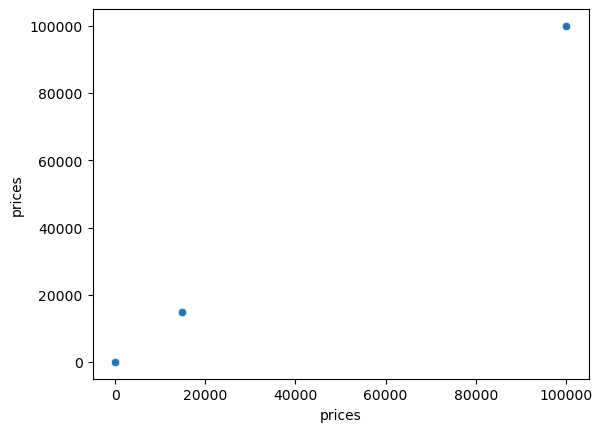

In [21]:
# using a scatterplot to identify outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge) 

In [22]:
# viewing outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648300,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648300,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792236,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792236,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426628,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743896,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743896,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153534,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381836,High spender,12.0,Regular customer


In [23]:
# updating outliers to 'missing' value
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
ords_prods_merge['prices'].max()

25.0

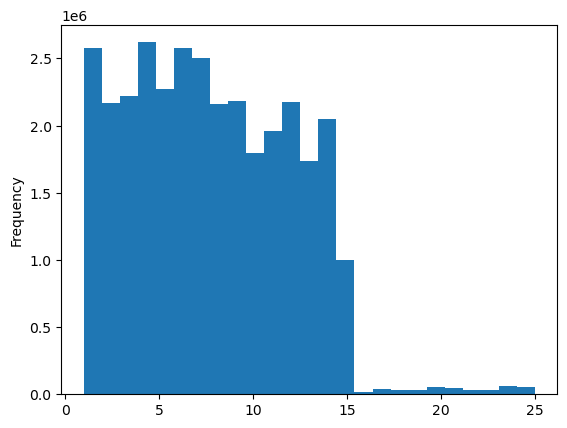

In [25]:
# re-trying histogram of "prices"
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

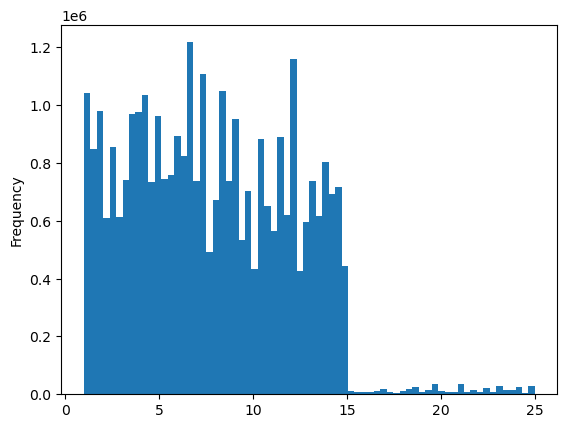

In [26]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [27]:
# exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# Sampling Data

In [29]:
# creating list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [32]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [33]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [34]:
len(ords_prods_merge)

32404859

In [35]:
len(big) + len(small)

32404859

In [36]:
df_2 = small[['order_day_of_week','prices']]

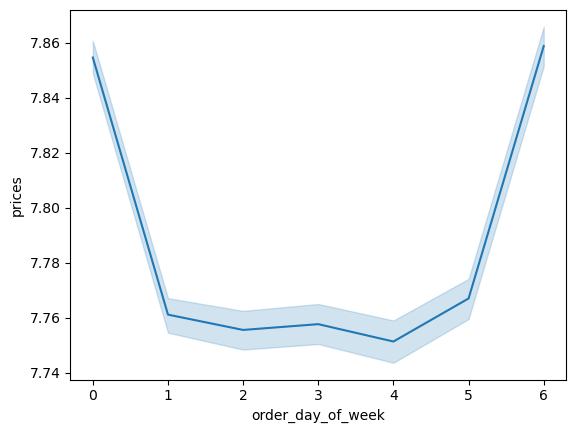

In [37]:
# creating line chart from subset
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')